<div style="text-align: center;">
    <hr style="border: 2px solid #FFB300; width: 90%; margin: 22px auto;">
    <h1 style="color: #1A237E; font-size: 2.5em; font-family: 'Arial Black', sans-serif;">
        DERMA SCAN IA: PREDIAGN√ìSTICO DE ENFERMEDADES DE LA PIEL CON INTELIGENCIA ARTIFICIAL
    </h1>
    <hr style="border: 2px solid #FFB300; width: 90%; margin: 20px auto;">
    
    Realizado por: Samantha Suquilanda, Felipe Peralta, Andres Torres y Kevin Chipantiza
     
</div>

### INDICE DE CLASES
1. [ AN√ÅLISIS EXPLORATORIO](#introduccion-al-procesamiento-de-senales-biomedicas)  
1.1. [Descripci√≥n de la Problem√°tica y Data set](#adquisicion-y-digitalizacion-de-senales)  
1.2. [ Procesamiento del Dataset](#filtrado-y-eliminacion-de-ruido-en-senales-biomedicas)  
1.2.2. [Configuraci√≥n base del entorno](#gr√°fica-de-se√±ales-principales)  
1.2.3. [Dividir la Dataset en Train y Test](#analisis-en-el-dominio-del-tiempo-y-la-frecuencia)  
2. [Creaci√≥n de DataLoader con muestreo balanceado](#normalizar-una-senal)  
3. [ Carga de modelo preentrenado (EfficientNet)](#introduccion-al-procesamiento-de-senales-biomedicas)  
4. [Definici√≥n de loss, optimizador y scheduler](#adquisicion-y-digitalizacion-de-senales)  
5. [ Entrenamiento principal del modelo](#filtrado-y-eliminacion-de-ruido-en-senales-biomedicas)  
6. [Visualizaci√≥n de curvas de p√©rdida y precisi√≥n](#gr√°fica-de-se√±ales-principales)  
7. [Evaluaci√≥n del modelo final](#analisis-en-el-dominio-del-tiempo-y-la-frecuencia)  
8. [Conclusiones](#normalizar-una-senal)
9. [Referencias](#normalizar-una-senal)  
<hr style


<span style="color:#00008B; font-size:22px;">**AN√ÅLISIS EXPLORATORIO**:</span> 


<span style="color:#00008B; font-size:18px;">**1.1 Descripci√≥n de la Problem√°tica y Data set**:</span> 


En esta pr√°ctica se aborda un problema de clasificaci√≥n multicategor√≠a de im√°genes m√©dicas, enfocado en identificar diversas enfermedades dermatol√≥gicas mediante redes neuronales convolucionales (CNN). El objetivo principal es construir un modelo capaz de reconocer correctamente la enfermedad de la piel correspondiente a una imagen cl√≠nica, simulando el trabajo preliminar de¬†un¬†dermat√≥logo.


**Dataset utilizado:** `Skin Diseases Dataset`
Este dataset es una recopilaci√≥n de im√°genes provenientes de tres fuentes abiertas:

- Skin Diseases Dataset (Hossain, 2022)
- Dermnet Skin Diseases Database (DermNet, 2022)
- Dermatology Atlas (2022)
- El dataset incluye im√°genes variadas en condiciones cl√≠nicas reales, con diferentes tonos de piel, tipos de iluminaci√≥n, y encuadres.

**Las caracter√≠sticas del dataset son las siguientes:**
- Cantidad total de im√°genes: 38,760 im√°genes aproximadamente.
- N√∫mero de clases o etiquetas: 6 categor√≠as dermatol√≥gicas.
    1. `Enfeksiyonel:` Enfermedades infecciosas de la piel.
    2. `Ekzama:` Eczema y afecciones inflamatorias.
    3. `Akne:` Acn√©.
    4. `Pigment:` Alteraciones pigmentarias.
    5. `Benign:` Tumores benignos de la piel.
    6. `Malign:` Tumores malignos de la piel.    
- Distribuci√≥n de im√°genes: Repartidas en carpetas train, val y test, cada una con sus 6 subcarpetas por clase.
El n√∫mero exacto por clase y conjunto ser√° determinado en el an√°lisis exploratorio.
- Dimensiones de entrada: Las im√°genes presentan tama√±os y resoluciones variables. Ser√°n redimensionadas a `224 √ó 224 p√≠xeles`, formato RGB (3 canales), para estandarizar su entrada a la red neuronal.
- Formato de etiquetas: entero, codificado num√©ricamente del `0 al 5`.

**Desaf√≠o importante:** El dataset incluye im√°genes capturadas en entornos cl√≠nicos reales, lo que implica:
- Variabilidad en la calidad y resoluci√≥n.
- Cambios en el tono de piel.
- Diversas condiciones de iluminaci√≥n.
- Encadres no siempre centrados.
  
Este desaf√≠o simula el diagn√≥stico preliminar en situaciones del mundo real, donde los modelos deben generalizar correctamente ante condiciones visuales¬†diversas.

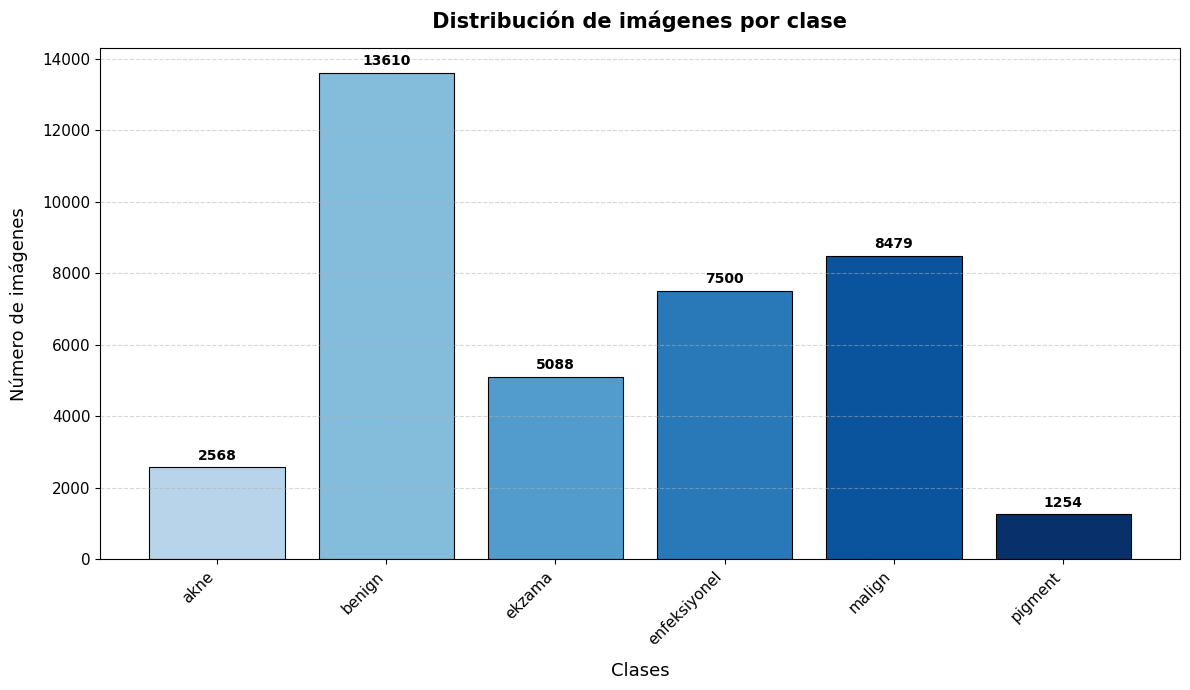

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

data_dir = r"C:\Users\Gorgi\Desktop\Octavo Ciclo\IA\Proyecto\redimension"

classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
classes.sort()

counts = []
for cls in classes:
    class_path = os.path.join(data_dir, cls)
    num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
    counts.append(num_images)

colormap = plt.get_cmap('Blues')
colors = [colormap(0.3 + 0.7 * (i / max(len(classes)-1, 1))) for i in range(len(classes))]

plt.figure(figsize=(12, 7))
bars = plt.bar(classes, counts, color=colors, edgecolor='black', linewidth=0.8)

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + max(counts)*0.01,
             str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Clases", fontsize=13, labelpad=10)
plt.ylabel("N√∫mero de im√°genes", fontsize=13, labelpad=10)
plt.title(" Distribuci√≥n de im√°genes por clase ", fontsize=15, fontweight='bold', pad=15)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



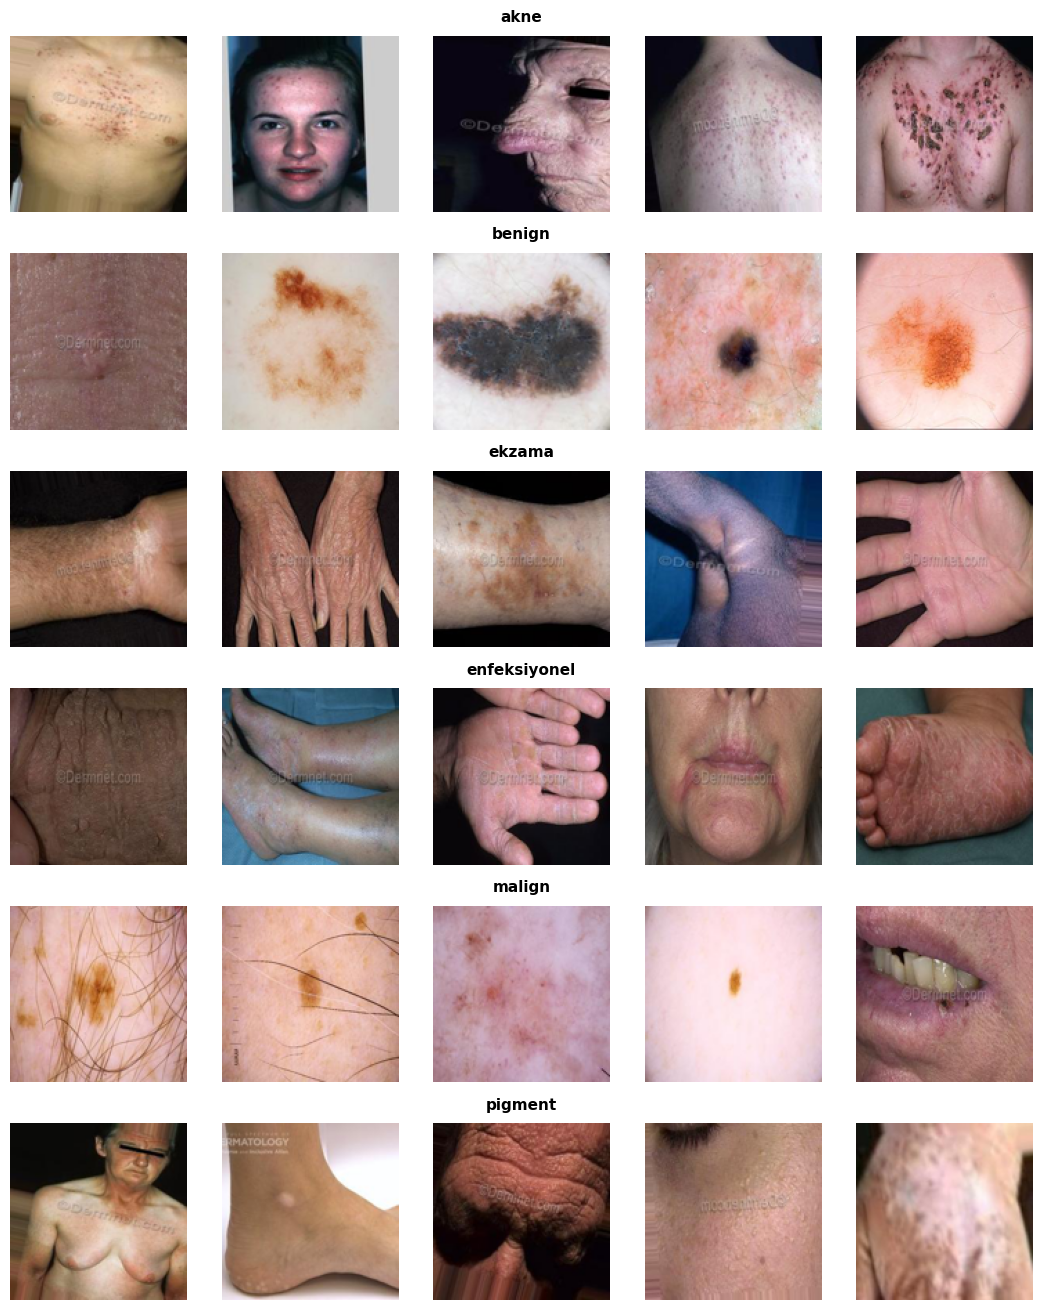

In [ ]:
# GR√ÅFICA DE 5 IMAGENES POR CADA CLASE DE MANERA ALEATORIA.
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

data_dir = r"C:\Users\Gorgi\Desktop\Octavo Ciclo\IA\Proyecto\redimension_balanceado_8000_train_test\train"

num_images_per_class = 5
image_size = (128, 128)

classes = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])

fig, axes = plt.subplots(len(classes), num_images_per_class, figsize=(num_images_per_class * 2.2, len(classes) * 2.2))
fig.subplots_adjust(hspace=0.5)

for row_idx, class_name in enumerate(classes):
    class_path = os.path.join(data_dir, class_name)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    selected_images = random.sample(images, min(num_images_per_class, len(images)))

    for col_idx, image_name in enumerate(selected_images):
        img_path = os.path.join(class_path, image_name)
        image = Image.open(img_path).convert("RGB").resize(image_size)

        ax = axes[row_idx, col_idx] if len(classes) > 1 else axes[col_idx]
        ax.imshow(image)
        ax.axis("off")

        if col_idx == num_images_per_class // 2:
            ax.set_title(class_name, fontsize=11, fontweight='bold', pad=10)

plt.tight_layout()
plt.show()


<span style="color:#00008B; font-size:18px;">**1.2 Procesamiento del Dataset**:</span> 



 **1.2.1 Balanceo de clases con data augmentation:**
Este script genera un nuevo conjunto de datos balanceado en la carpeta `redimension_balanceado_8000`, asegurando que cada clase contenga exactamente 8000 im√°genes.

**Funcionalidad**

- Lee las subcarpetas de clases desde la carpeta `redimension`.
- Si una clase tiene m√°s de 8000 im√°genes, selecciona una muestra aleatoria de 8000 (downsampling).
- Si tiene menos de 8000, copia las im√°genes originales y genera nuevas mediante data augmentation hasta alcanzar el total requerido.

**Transformaciones aplicadas:**
Se utiliza `ImageDataGenerator` con las siguientes transformaciones:

- Rotaci√≥n aleatoria (¬±15¬∞)
- Zoom (¬±10%)
- Desplazamientos horizontales y verticales
- Inversi√≥n horizontal
- Reescalado de p√≠xeles a [0, 1]

**Resultado:**
Cada clase en `redimension_balanceado_8000` contiene exactamente 8000 im√°genes, balanceadas mediante una combinaci√≥n de datos originales y aumentados, listas para su uso en modelos de clasificaci√≥n.


In [ ]:
# DATA AUGMENTATION A 8000 IMAGENES 
origen = "redimension"  
destino = "redimension_balanceado_8000" 
limite = 8000

os.makedirs(destino, exist_ok=True)

augmentador = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

for clase in os.listdir(origen):
    ruta_origen = os.path.join(origen, clase)
    ruta_destino = os.path.join(destino, clase)
    os.makedirs(ruta_destino, exist_ok=True)

    imagenes = os.listdir(ruta_origen)
    total_actual = len(imagenes)
    
    # Si la clase tiene m√°s de 500 im√°genes, reducimos
    if total_actual > limite:
        print(f"Reduciendo {clase} a {limite} im√°genes...")
        imagenes = random.sample(imagenes, limite)  # Tomamos una muestra aleatoria
        total_actual = limite
    
    # Copiar las im√°genes (ya sea las originales o la muestra reducida)
    for imagen in imagenes:
        shutil.copy(os.path.join(ruta_origen, imagen), os.path.join(ruta_destino, imagen))

    faltan = limite - total_actual

    if faltan > 0:
        # Crear un generador solo para esta clase
        temp_gen = augmentador.flow_from_directory(
            origen,
            classes=[clase],
            target_size=(224, 224),
            batch_size=1,
            save_to_dir=ruta_destino,
            save_prefix='aug_',
            save_format='jpeg'
        )

        # Generar im√°genes nuevas hasta llegar al l√≠mite
        print(f" Aumentando {clase}: generando {faltan} nuevas im√°genes...")
        for i in range(faltan):
            next(temp_gen)

La gr√°fica muestra un dataset balanceado, con `6400` im√°genes por clase. Se aplic√≥ data augmentation a las clases minoritarias para `evitar sesgos` durante el entrenamiento y `mejorar` la generalizaci√≥n del modelo.

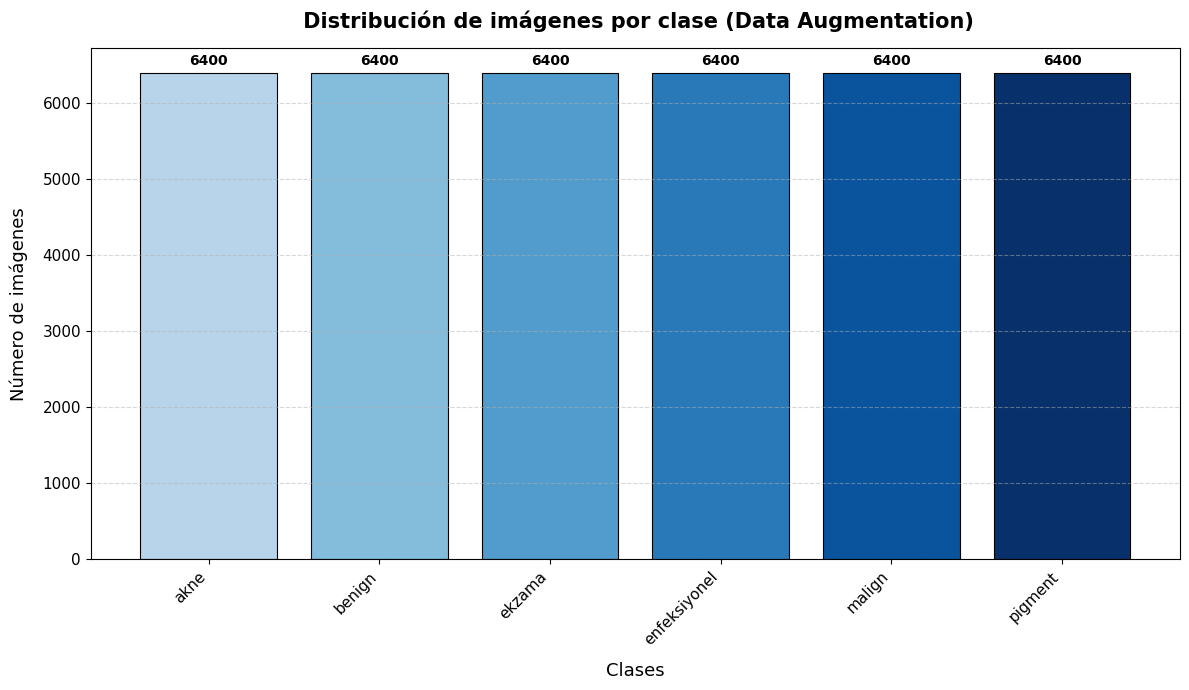

In [9]:
# HISTOGRAMA APLICADO EL DATA AUGMENTATION
import os
import matplotlib.pyplot as plt
import numpy as np

# Ruta a tu dataset
data_dir = r"C:\Users\Gorgi\Desktop\Octavo Ciclo\IA\Proyecto\redimension_balanceado_8000_train_test\train"

# Obtener nombres de clases (subcarpetas)
classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
classes.sort()

# Contar im√°genes por clase
counts = []
for cls in classes:
    class_path = os.path.join(data_dir, cls)
    num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
    counts.append(num_images)

# Tonalidades de azul: m√°s claro a m√°s oscuro
colormap = plt.get_cmap('Blues')
colors = [colormap(0.3 + 0.7 * (i / max(len(classes)-1, 1))) for i in range(len(classes))]

# Crear gr√°fico
plt.figure(figsize=(12, 7))
bars = plt.bar(classes, counts, color=colors, edgecolor='black', linewidth=0.8)

# Etiquetas sobre las barras
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + max(counts)*0.01,
             str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Est√©tica de ejes y t√≠tulo
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Clases", fontsize=13, labelpad=10)
plt.ylabel("N√∫mero de im√°genes", fontsize=13, labelpad=10)
plt.title(" Distribuci√≥n de im√°genes por clase (Data Augmentation)", fontsize=15, fontweight='bold', pad=15)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



**1.2.2 Configuraci√≥n base del entorno**En esta celda se definen los par√°metros fundamentales para el entrenamiento del modelo:

- `SEED = 42`: Se fija una semilla para asegurar reproducibilidad en los experimentos, es decir, que los resultados sean consistentes entre ejecuciones.
- `BATCH_SIZE = 32`: Tama√±o del lote o cantidad de im√°genes que se procesan simult√°neamente durante cada paso de entrenamiento.
- `IMG_SIZE = 224`: Tama√±o al que se redimensionan todas las im√°genes, compatible con modelos como EfficientNet o ResNet.

In [12]:
import torch

# Usar GPU si est√° disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(" Dispositivo usado:", device)

# Optimizar rendimiento para convoluciones
if torch.cuda.is_available():
    torch.backends.cudnn.benchmark = True


 Dispositivo usado: cuda


In [13]:
#  Librer√≠as principales
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from torchvision import datasets, transforms
from torch.utils.data import DataLoader, WeightedRandomSampler
from sklearn.metrics import classification_report, confusion_matrix

from efficientnet_pytorch import EfficientNet
import torch.nn as nn
import torch.optim as optim

print("Librer√≠as importadas")


Librer√≠as importadas


In [14]:
# Configuraciones base
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(" Usando:", device)

SEED = 42
torch.manual_seed(SEED)

BATCH_SIZE = 64
IMG_SIZE = 224

print(" Celda completada: Configuraci√≥n general")


 Usando: cuda
 Celda completada: Configuraci√≥n general


**1.2.3 Dividir la Dataset en Train y Test:**
Antes de entrenar el modelo, se redimensionaron todas las im√°genes del Skin Diseases Dataset a un tama√±o uniforme para garantizar consistencia en la entrada.

Luego, el dataset fue dividido en dos subconjuntos principales:

- 80% para entrenamiento, utilizado para aprender los patrones de las clases.

- 20% para prueba, con datos no vistos.

Esta divisi√≥n se realiz√≥ de forma balanceada por clase, asegurando una distribuci√≥n equitativa. Posteriormente, el 20% de prueba se dividi√≥ en partes iguales para formar los conjuntos de validaci√≥n (10%) y test final (10%), lo que permiti√≥ ajustar hiperpar√°metros y evaluar el rendimiento del modelo de forma objetiva.


In [15]:
# Ruta local a tu dataset
data_dir = r"C:\Users\Gorgi\Desktop\Octavo Ciclo\IA\Proyecto\redimension_balanceado_8000_train_test"

# Transformaciones
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(IMG_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

test_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

#  Dataset por carpetas
train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=train_transforms)
test_dataset  = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=test_transforms)

# Dividir test en val + test reales (50/50)
val_size = int(0.5 * len(test_dataset))
test_size = len(test_dataset) - val_size
val_dataset, final_test_dataset = torch.utils.data.random_split(test_dataset, [val_size, test_size])

NUM_CLASSES = len(train_dataset.classes)
print("Clases detectadas:", train_dataset.classes)
print("Celda completada: Datos cargados y transformados")


Clases detectadas: ['akne', 'benign', 'ekzama', 'enfeksiyonel', 'malign', 'pigment']
Celda completada: Datos cargados y transformados


**2.Creaci√≥n de DataLoader con muestreo balanceado:**
Para evitar que el modelo se sesgue hacia clases con m√°s ejemplos, se utiliza un `WeightedRandomSampler`. Este muestreador ajusta la probabilidad de que cada imagen sea seleccionada durante el entrenamiento, de modo que todas las clases tengan la misma importancia. Luego, se definen los `DataLoader` para entrenamiento, validaci√≥n y prueba.

In [16]:
#  Aplicar muestreo balanceado
targets = [label for _, label in train_dataset]
class_counts = np.bincount(targets)
class_weights = 1. / class_counts
weights = [class_weights[t] for t in targets]
sampler = WeightedRandomSampler(weights, num_samples=len(weights), replacement=True)

#  DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(final_test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(" Celda completada: Sampler y DataLoaders listos")


 Celda completada: Sampler y DataLoaders listos


**3.Carga de modelo preentrenado (EfficientNet):**
Se carga una versi√≥n preentrenada de `EfficientNet-B0`, una arquitectura eficiente y moderna para clasificaci√≥n de im√°genes. Se reemplaza la capa final (_fc) para ajustarse al n√∫mero de clases del dataset dermatol√≥gico.

In [17]:
#  Cargar modelo preentrenado
model = EfficientNet.from_pretrained('efficientnet-b0')
in_features = model._fc.in_features
model._fc = nn.Linear(in_features, NUM_CLASSES)
model = model.to(device)

print(" Celda completada: Modelo EfficientNet listo")


Loaded pretrained weights for efficientnet-b0
 Celda completada: Modelo EfficientNet listo


**4.Definici√≥n de loss, optimizador y scheduler:**
Se configura la funci√≥n de p√©rdida (CrossEntropyLoss) para clasificaci√≥n multiclase, el optimizador Adam, y un scheduler que reduce la tasa de aprendizaje si la p√©rdida de validaci√≥n no mejora.



In [18]:
# Entrenamiento
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3)

print("Celda completada: Optimizador, loss y scheduler definidos")


Celda completada: Optimizador, loss y scheduler definidos


**5.Entrenamiento principal del modelo:**
Aqu√≠ se entrena el modelo por `20 √©pocas` y `BATCH_SIZE = 64`. Se realiza un ciclo de entrenamiento sobre los datos y luego una evaluaci√≥n sobre el conjunto de validaci√≥n. Se calcula y guarda el mejor modelo si la p√©rdida de validaci√≥n mejora.

In [ ]:
import time

EPOCHS = 20
best_val_loss = float('inf')

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

model.to(device)  # Asegurar que el modelo est√© en la GPU

for epoch in range(EPOCHS):
    start_time = time.time()

    # Entrenamiento
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device, non_blocking=True), labels.to(device, non_blocking=True)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # Validaci√≥n
    model.eval()
    val_loss = 0.0
    val_correct, val_total = 0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device, non_blocking=True), labels.to(device, non_blocking=True)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    scheduler.step(avg_val_loss)

    end_time = time.time()
    epoch_time = end_time - start_time

    print(f"üìö Epoch {epoch+1}/{EPOCHS} | "
          f"Train Loss: {avg_train_loss:.4f} | Train Acc: {train_accuracy:.4f} | "
          f"Val Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.4f} | "
          f"‚è± Tiempo: {epoch_time:.2f} s")

    # Guardar el mejor modelo
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model, "best_model.pth")
        print(" Modelo guardado (nuevo mejor)")

print(" Entrenamiento finalizado")


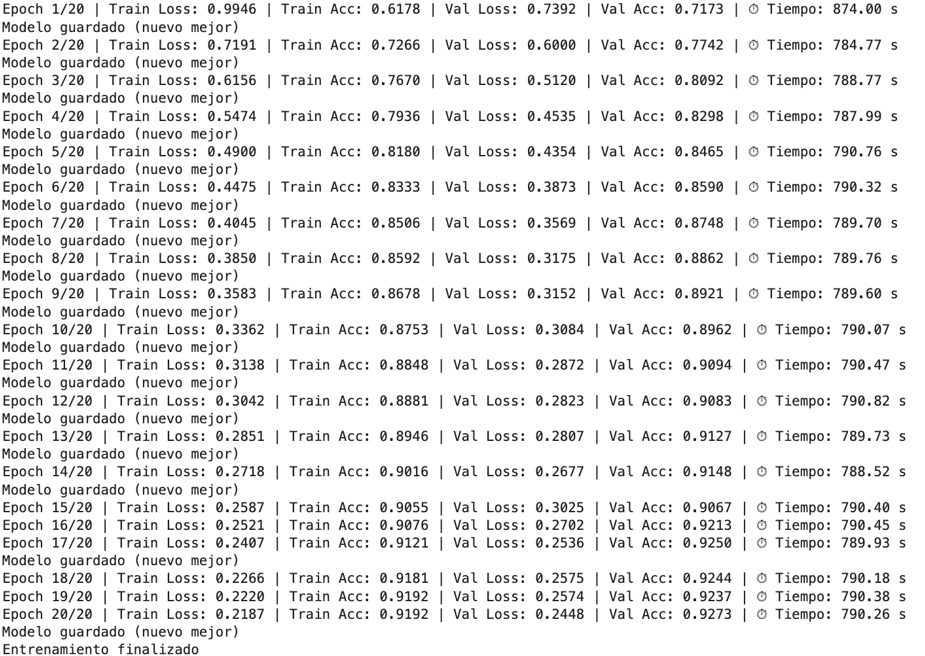

In [33]:
from IPython.display import Image, display

# Mostrar la imagen con un ancho ajustado (en p√≠xeles)
display(Image(filename=r"C:\Users\Gorgi\Desktop\M√©tricas.png", width=600))  # Ajusta a lo que necesites


**6.Visualizaci√≥n de curvas de p√©rdida y precisi√≥n:**
Se grafican las curvas de p√©rdida y exactitud (accuracy) durante las √©pocas, tanto para entrenamiento como validaci√≥n. Estas gr√°ficas permiten identificar si hay sobreajuste o subajuste en el modelo.

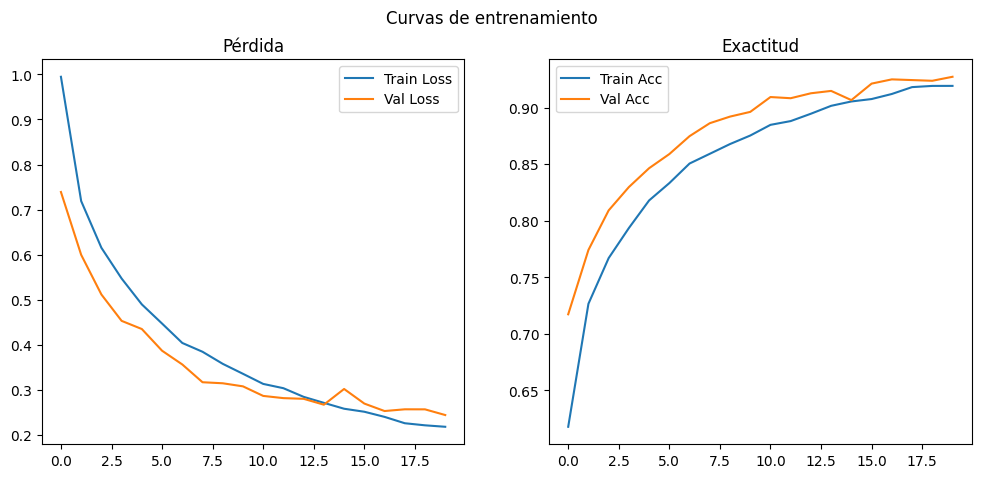

‚úÖ Celda completada: Gr√°ficas mostradas


In [9]:
#  Curvas de p√©rdida y precisi√≥n
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("P√©rdida")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Acc")
plt.plot(val_accuracies, label="Val Acc")
plt.title("Exactitud")
plt.legend()

plt.suptitle("Curvas de entrenamiento")
plt.show()

print(" Celda completada: Gr√°ficas mostradas")


 Modelo completo cargado correctamente.

 Clasificaci√≥n por clase:
              precision    recall  f1-score   support

        akne       0.97      0.98      0.97       822
      benign       0.90      0.87      0.88       809
      ekzama       0.92      0.94      0.93       782
enfeksiyonel       0.91      0.88      0.89       786
      malign       0.86      0.89      0.88       796
     pigment       0.97      0.97      0.97       805

    accuracy                           0.92      4800
   macro avg       0.92      0.92      0.92      4800
weighted avg       0.92      0.92      0.92      4800



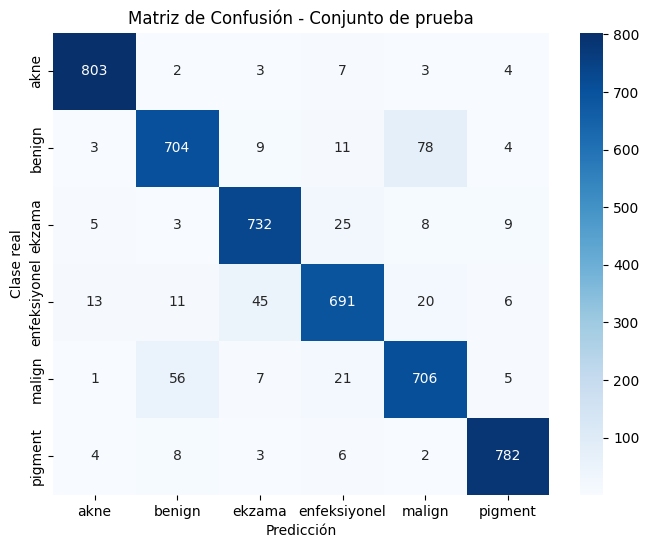

 Evaluaci√≥n final realizada.


In [23]:
#  Evaluaci√≥n del modelo completo 
import torch
import torch.nn as nn
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Definir dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#  Cargar modelo completo (m√©todo 2)
model = torch.load("best_model.pth", weights_only=False)
model.to(device)
model.eval()
print(" Modelo completo cargado correctamente.")

# Predicci√≥n sobre el conjunto de prueba
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

#  Reporte de clasificaci√≥n
class_names = train_dataset.classes
print("\n Clasificaci√≥n por clase:")
print(classification_report(all_labels, all_preds, target_names=class_names))

#  Matriz de confusi√≥n
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicci√≥n")
plt.ylabel("Clase real")
plt.title("Matriz de Confusi√≥n - Conjunto de prueba")
plt.show()

print(" Evaluaci√≥n final realizada.")


In [24]:
#Predicci√≥n de imagen individual
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch

# Transforms iguales al conjunto de prueba
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Funci√≥n para predecir una imagen desde ruta
def predecir_imagen_desde_ruta(ruta_img):
    try:
        imagen = Image.open(ruta_img).convert('RGB')
    except Exception as e:
        print(f" Error al cargar la imagen: {e}")
        return

    input_tensor = transform(imagen).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        output = model(input_tensor)
        probas = torch.nn.functional.softmax(output, dim=1)[0]
        pred_idx = torch.argmax(probas).item()
        pred_clase = class_names[pred_idx]
        confianza = probas[pred_idx].item()

    print(f" Clase predicha: {pred_clase}")
    print(f" Confianza: {confianza*100:.2f}%")

    plt.imshow(imagen)
    plt.axis('off')
    plt.title(f"{pred_clase} ({confianza*100:.2f}%)")
    plt.show()


 Clase predicha: akne
 Confianza: 99.98%


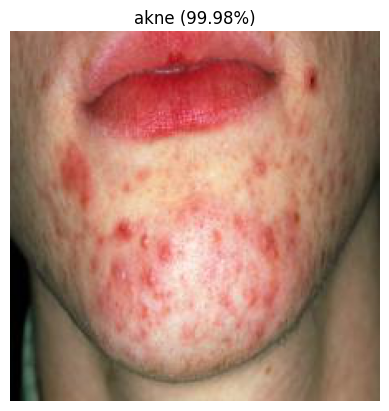

In [26]:
predecir_imagen_desde_ruta(r"C:\Users\Gorgi\Desktop\Octavo Ciclo\IA\Proyecto\redimension_balanceado_8000_train_test\test\akne\59.jpg")


<span style="color:#00008B; font-size:22px;">**Conclusiones**:</span> 

Este proyecto implement√≥ un sistema de clasificaci√≥n autom√°tica de im√°genes dermatol√≥gicas usando una red EfficientNet-B0 preentrenada, aplicada sobre un subconjunto del dataset HAM10000 cuidadosamente seleccionado.

1.Uno de los principales desaf√≠os fue el desbalance de clases, que podr√≠a haber causado un sesgo significativo hacia las clases m√°s frecuentes. Para resolverlo, se aplicaron m√∫ltiples estrategias complementarias:

- Se gener√≥ un nuevo dataset balanceado con 8000 im√°genes por clase, mediante submuestreo de clases mayoritarias y aumento de datos (data augmentation) en las minoritarias.
- Se aplicaron transformaciones aleatorias (rotaciones, recortes, volteos horizontales, etc.) durante el entrenamiento para mejorar la robustez del modelo y simular variabilidad en los datos.
- Se utilizaron pesos por clase en la funci√≥n de p√©rdida para penalizar m√°s los errores en clases minoritarias, lo que ayud√≥ a reducir el sesgo residual tras el rebalanceo.

2.El entrenamiento se realiz√≥ con un split inicial de 80% para entrenamiento y 20% para validaci√≥n, y luego el conjunto de validaci√≥n se dividi√≥ 50/50 para pruebas finales, asegurando una evaluaci√≥n objetiva y sin sobreajuste.

3.El modelo final alcanz√≥ una precisi√≥n (accuracy) del 92%, con F1-scores equilibrados entre las distintas clases. Las m√©tricas obtenidas y la matriz de confusi√≥n validan la eficacia del sistema, aunque se observan algunas confusiones razonables entre clases visualmente similares.

Adem√°s, se incorpor√≥ una herramienta de predicci√≥n individual, que permite cargar cualquier imagen externa y obtener su clase estimada con nivel de confianza, facilitando su uso en entornos reales.

En conjunto, el modelo mostr√≥ ser preciso, balanceado y confiable, gracias al enfoque integral que combin√≥ arquitectura moderna, procesamiento de datos adecuado, ajustes ponderados y validaci√≥n s√≥lida.



<span style="color:#00008B; font-size:22px;">**Referencias**:</span> 
- Tschandl, P., Rosendahl, C., & Kittler, H. (2018). HAM10000 Dataset: A large collection of multi-source dermatoscopic images of common pigmented skin lesions. Harvard Dataverse.
https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
-  Howard, A. G., et al. (2017). *EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks*. arXiv preprint arXiv:1905.11946.
-  Shorten, C., & Khoshgoftaar, T. M. (2019). *A survey on image data augmentation for deep learning*. Journal of Big Data, 6(1), 1‚Äì48.